<a href="https://colab.research.google.com/github/lindseycarlson23/stock-news-sentiment/blob/main/NLP_Project_Full_Code_Version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

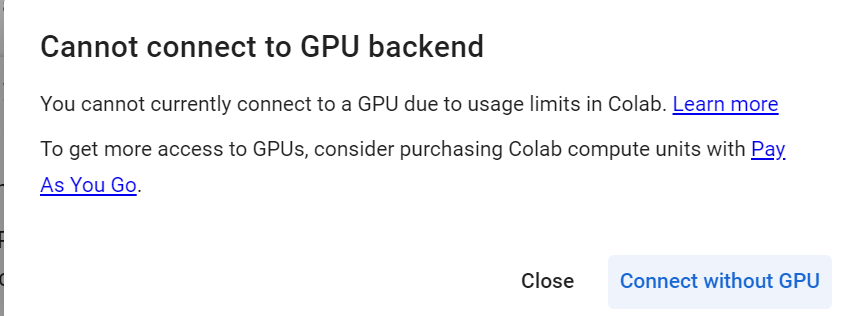

## **Installing and Importing Necessary Libraries**

In [ ]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 56.5 MB/s eta 0:00:00


In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to compute distances
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

# importing the PyTorch Deep Learning library
import torch

# to import the model
from sentence_transformers import SentenceTransformer

# to cluster the data
from sklearn.cluster import KMeans

# to compute metrics
from sklearn.metrics import classification_report

# to avoid displaying unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
news = pd.read_csv('/content/drive/MyDrive/AIML_Program/NLP/stock_news.csv')

In [ ]:
data = news.copy()

## **Data Overview**

### Checking the first five rows of the data

In [ ]:
# print first 5 rows of the dataset
data.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",41.740002,42.244999,41.482498,40.246914,130672400,-1


### Checking the last five rows of the data

In [ ]:
data.tail()

,Date,News,Open,High,Low,Close,Volume,Label
344,2019-04-30,"Media mogul Oprah Winfrey, known for influencing millions with her opinions on diets and books, is considering which Democratic presidential candidate to endorse in 2020. She told the Hollywood Reporter she's ""quietly figuring out where I'm going to use my voice"" and will make a clear announcement",50.764999,50.849998,49.7775,48.70879,186139600,-1
345,2019-04-30,"European shares fell on Tuesday, with banks underperforming amid a decline in China's manufacturing activity and awaiting euro zone economic growth numbers. The pan-European STOXX 600 index dropped 0.7% while major indices fell except London's FTSE 100. Danske Bank plunged",50.764999,50.849998,49.7775,48.70879,186139600,-1
346,2019-04-30,"This article reports that the S&P 500 reached another record high close on Tuesday, marking its best four-month stretch since late 2010. Apple's strong quarterly results and positive earnings forecast helped ease concerns about the bull run's sustainability, despite a revenue miss from Google parent Alphabet. The",50.764999,50.849998,49.7775,48.70879,186139600,-1
347,2019-04-30,"The Federal Reserve is anticipated to keep interest rates unchanged in their upcoming meeting, with a likelihood of a rate cut expected later this year. The Fed Chairman's press conference may provide significant market impact as investors seek insights on economic growth and inflation. Apple's earnings report exceeded expectations, leading to a post-market surge in shares, while",50.764999,50.849998,49.7775,48.70879,186139600,-1
348,2019-04-30,"In the first quarter, South Korea's Samsung Electronics reported its weakest profit in over two years due to falls in chip prices and slowing demand for display panels. The tech giant expects improved results in the second half of 2019, driven by a pickup in memory chip and smartphone sales. However, memory chip",50.764999,50.849998,49.7775,48.70879,186139600,0


### Checking the shape of the data

In [ ]:
data.shape

(349, 8)

* There are 349 rows and 8 columns.

### Checking for missing values

In [ ]:
data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


* There are no missing values.

### Checking for duplicate values

In [ ]:
data.duplicated().sum()

0

* There are no duplicate values.

### Checking the data types of the columns in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


### Statistical summary of the numerical columns

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    349 non-null    datetime64[ns]
 1   News    349 non-null    object        
 2   Open    349 non-null    float64       
 3   High    349 non-null    float64       
 4   Low     349 non-null    float64       
 5   Close   349 non-null    float64       
 6   Volume  349 non-null    int64         
 7   Label   349 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 21.9+ KB


In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,349,2019-02-16 16:05:30.085959936,2019-01-02 00:00:00,2019-01-14 00:00:00,2019-02-05 00:00:00,2019-03-22 00:00:00,2019-04-30 00:00:00,NaN
Open,349.0,46.229233,37.567501,41.740002,45.974998,50.7075,66.817497,6.442817
High,349.0,46.700458,37.817501,42.244999,46.025002,50.849998,67.0625,6.507321
Low,349.0,45.745394,37.305,41.482498,45.639999,49.7775,65.862503,6.391976
Close,349.0,44.926317,36.254131,40.246914,44.596924,49.11079,64.805229,6.398338
Volume,349.0,128948236.103152,45448000.0,103272000.0,115627200.0,151125200.0,244439200.0,43170314.918964
Label,349.0,-0.054441,-1.0,-1.0,0.0,0.0,1.0,0.715119


## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observation on Label

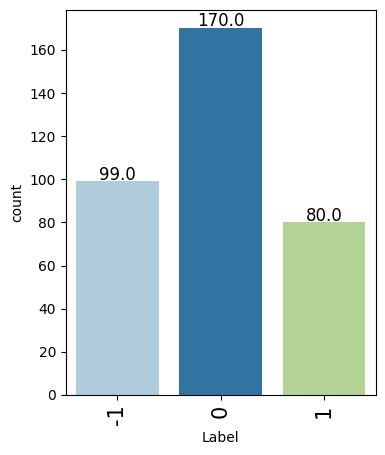

In [ ]:
labeled_barplot(data, "Label")

* There are 99 Negative, 170 Neutral, and 80 Positive labels.
* The data is imbalanced.

### Add a column to show the change in stock price

In [ ]:
data['Price_Change'] = data['Close'] - data['Open']

In [ ]:
data.head()

,Date,News,Open,High,Low,Close,Volume,Label,Price_Change
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,-1,-1.493088
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,-1,-1.493088
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,-1,-1.493088
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,-1,-1.493088
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",41.740002,42.244999,41.482498,40.246914,130672400,-1,-1.493088


In [ ]:
num_unique_dates = data['Date'].nunique()
print("Number of unique dates:", num_unique_dates)

Number of unique dates: 71


* There are 71 unique dates.

### Word count for entries in News column

In [ ]:
# function to count words in a single entry
def count_words(text):
    return len(text.split())

# applying this function the News column
data['Word_Count'] = data['News'].apply(count_words)

In [ ]:
print(data[['News', 'Word_Count']].head())

                                                                                                                                                                                                                                                                                                                                   News  \
0   The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.   
1    Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10   
2      

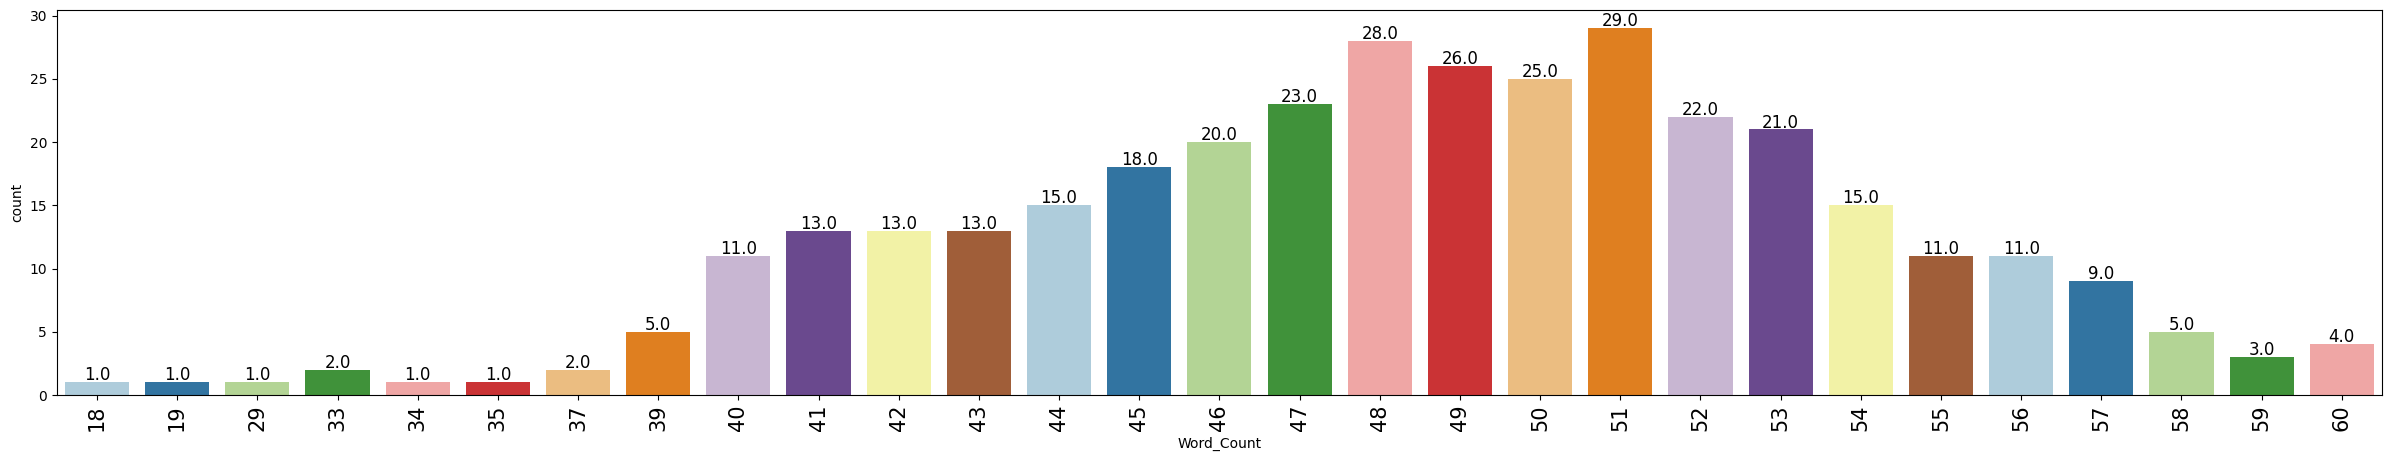

In [ ]:
labeled_barplot(data, "Word_Count")

In [ ]:
word_count_stats = data['Word_Count'].describe()
print(word_count_stats)

count    349.000000
mean      48.349570
std        5.717324
min       18.000000
25%       45.000000
50%       49.000000
75%       52.000000
max       60.000000
Name: Word_Count, dtype: float64


* The average word count is 48.3. The data is left skewed.
* The range is from 18-60 words.

### Observations on Opening Price

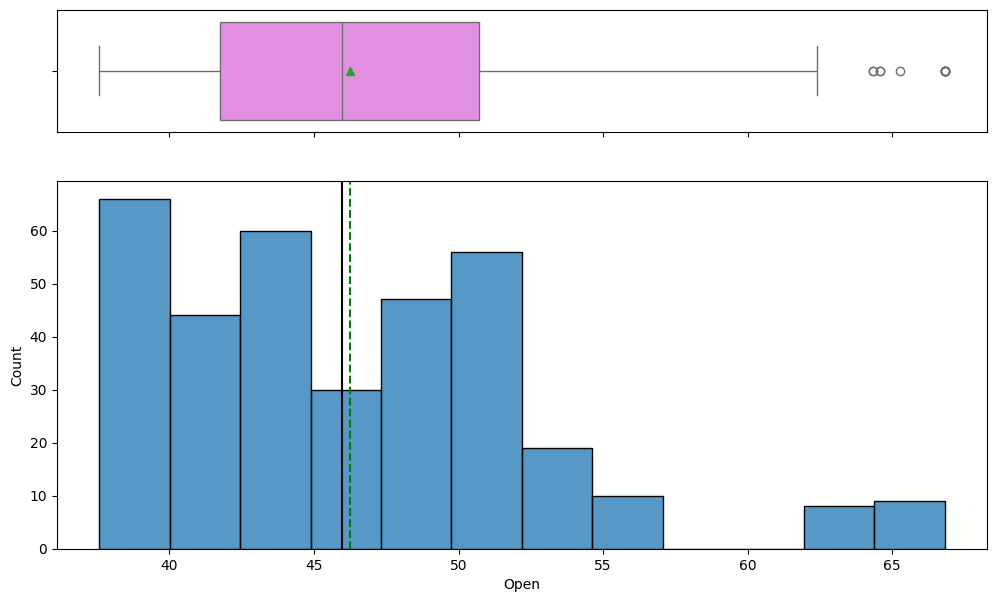

In [ ]:
histogram_boxplot(data, 'Open')

### Observations on the Closing Price

In [ ]:
variance = data['Close'].var()
mode = data['Close'].mode()

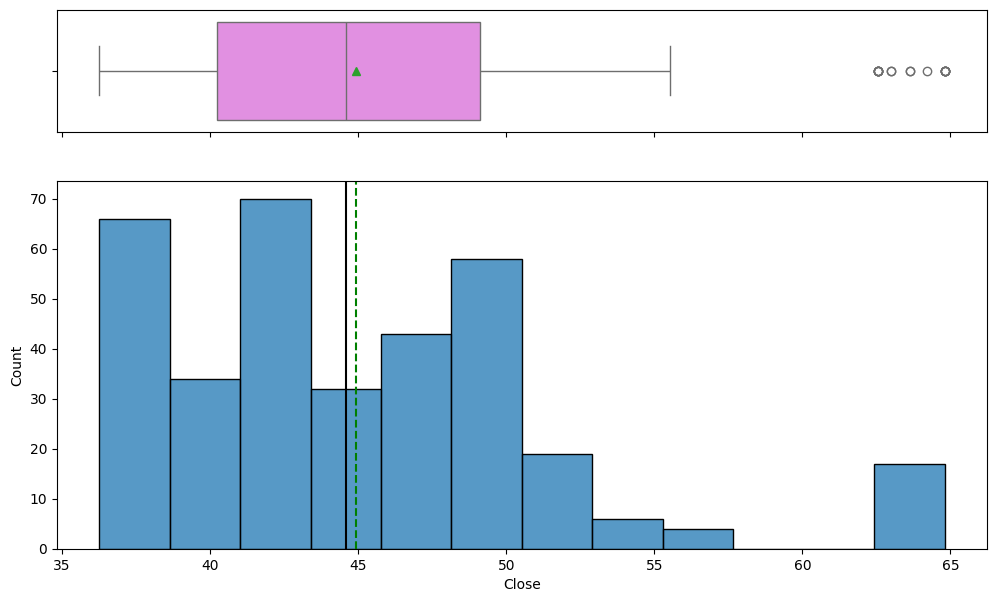

In [ ]:
histogram_boxplot(data, 'Close')

### Observations on Change in Price

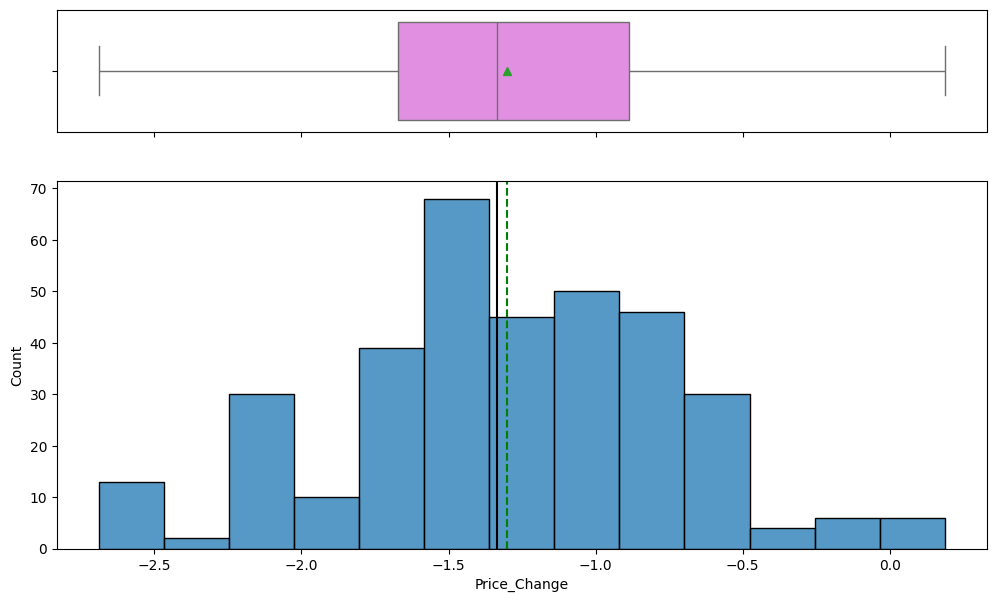

In [ ]:
histogram_boxplot(data, 'Price_Change')

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

### Correlation Heatmap

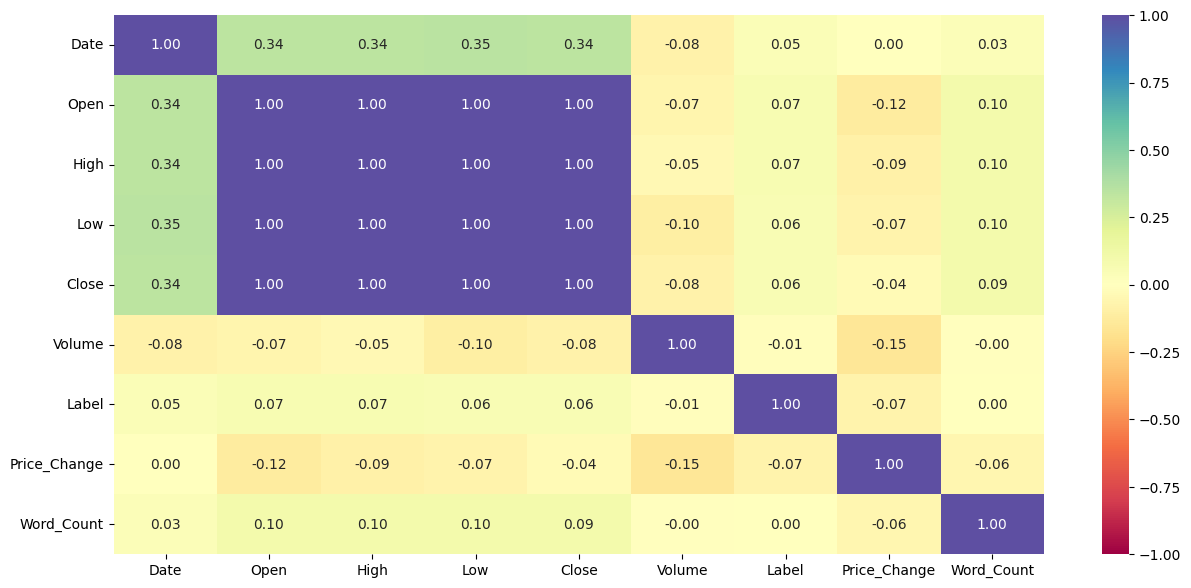

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64', 'datetime64']).columns
numerical_data = data[numerical_columns]

plt.figure(figsize=(15, 7))
sns.heatmap(numerical_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Slight negative correlation between Volume and Price_Change, suggesting that more trades will result in a lower price.
* Very slight negative correlation between Label and Price_Change.
* Very slight positive correlation between Label and Close, and Label and Open.

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))


    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    plt.show()

Label      -1    0   1  All
Close                      
All        99  170  80  349
50.787209   2    2   5    9
36.996128   4    3   4   11
37.051727   2    4   4   10
42.470604  14   10   4   28
...        ..  ...  ..  ...
41.45842    1    4   0    5
49.398319   1    0   0    1
47.417465   0    1   0    1
48.70879    4    5   0    9
49.589897   0    1   0    1

[72 rows x 4 columns]
------------------------------------------------------------------------------------------------------------------------


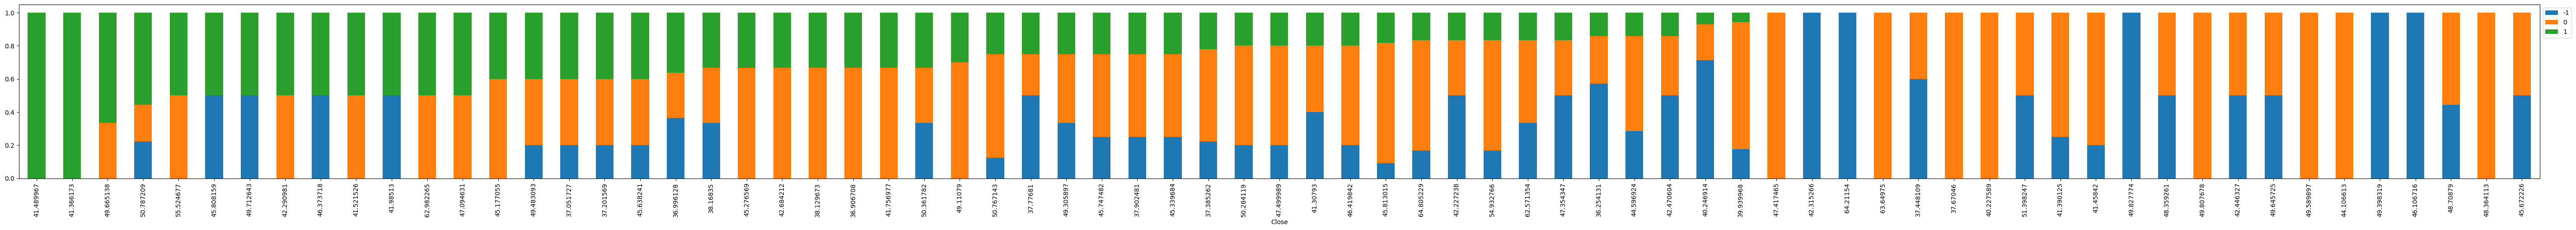

In [ ]:
stacked_barplot(data, 'Close', 'Label')

* You can see the correlation between the Label and the Close.

Label         -1    0   1  All
Price_Change                  
 All          99  170  80  349
-2.687789      2    2   5    9
-2.050774      2    4   4   10
-0.571373      4    3   4   11
-1.099396     14   10   4   28
...           ..  ...  ..  ...
-1.055962      1    0   0    1
-1.061775      1    1   0    2
-1.112236      1    0   0    1
-1.350784      2    0   0    2
-1.285739      1    1   0    2

[72 rows x 4 columns]
------------------------------------------------------------------------------------------------------------------------


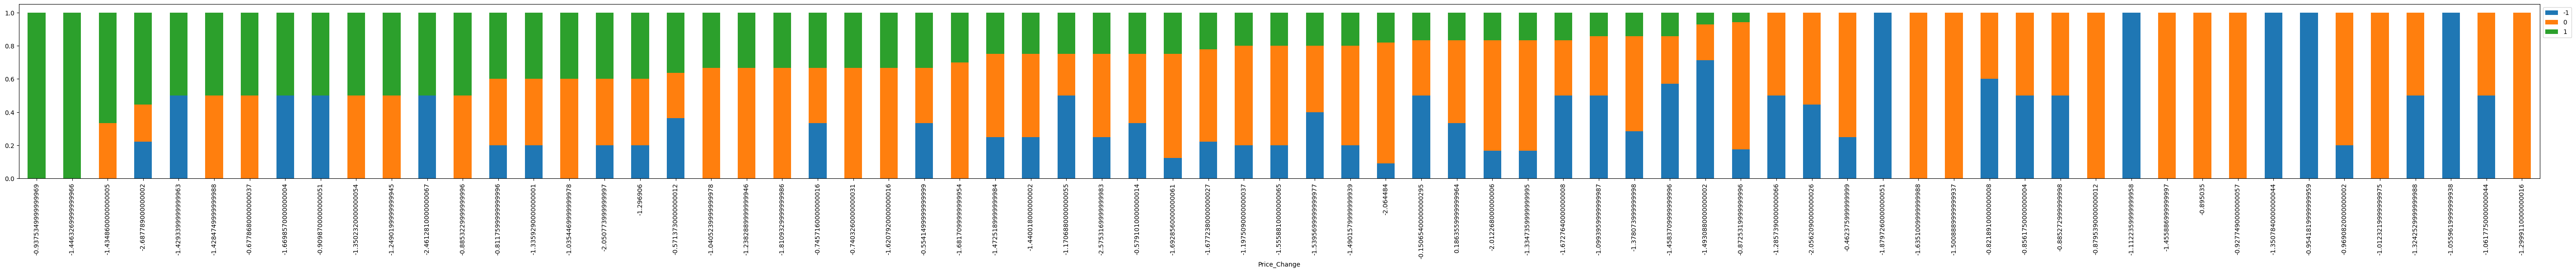

In [ ]:
stacked_barplot(data, 'Price_Change', 'Label')

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()


    plt.show()


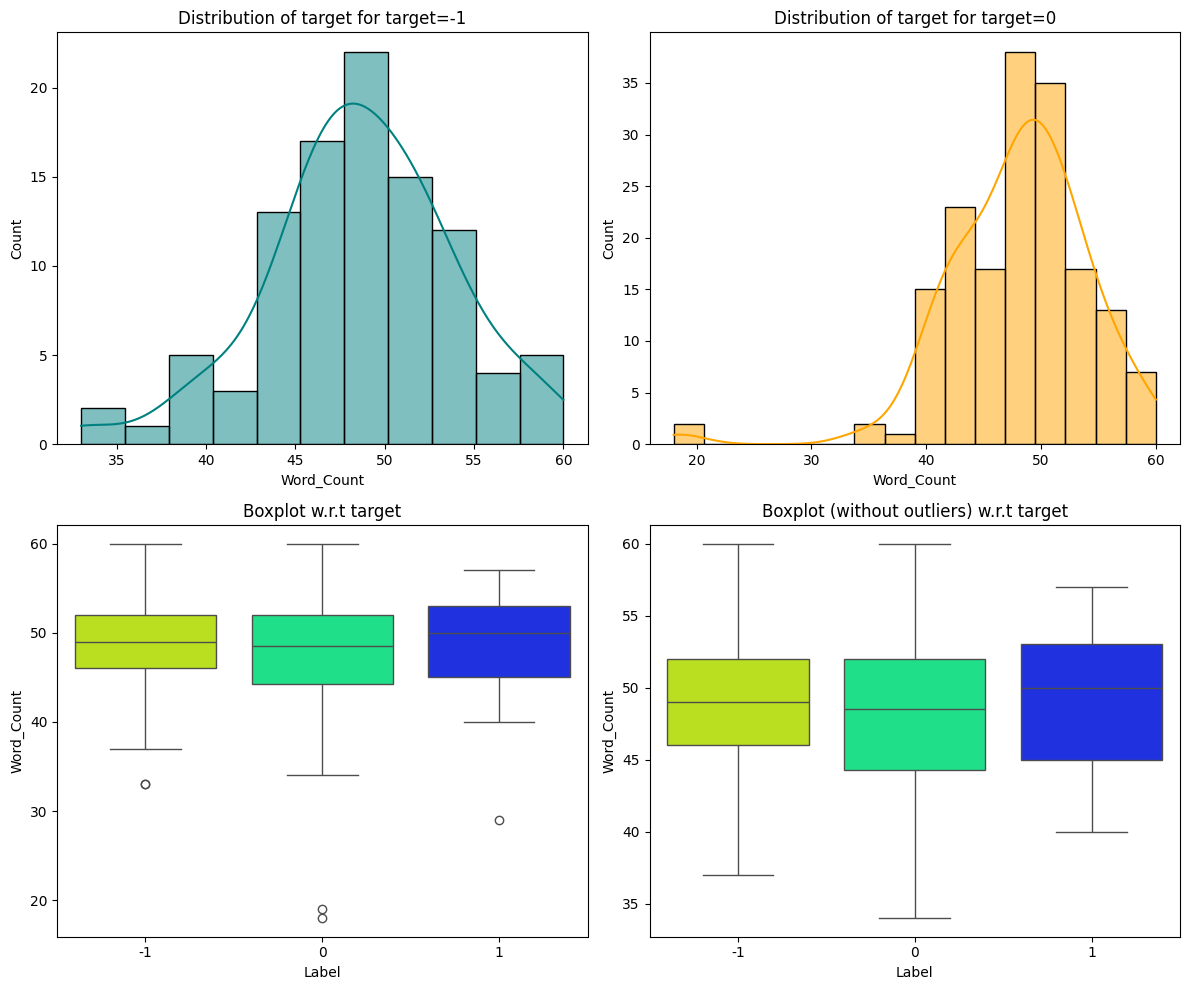

In [ ]:
distribution_plot_wrt_target(data, "Word_Count", "Label")

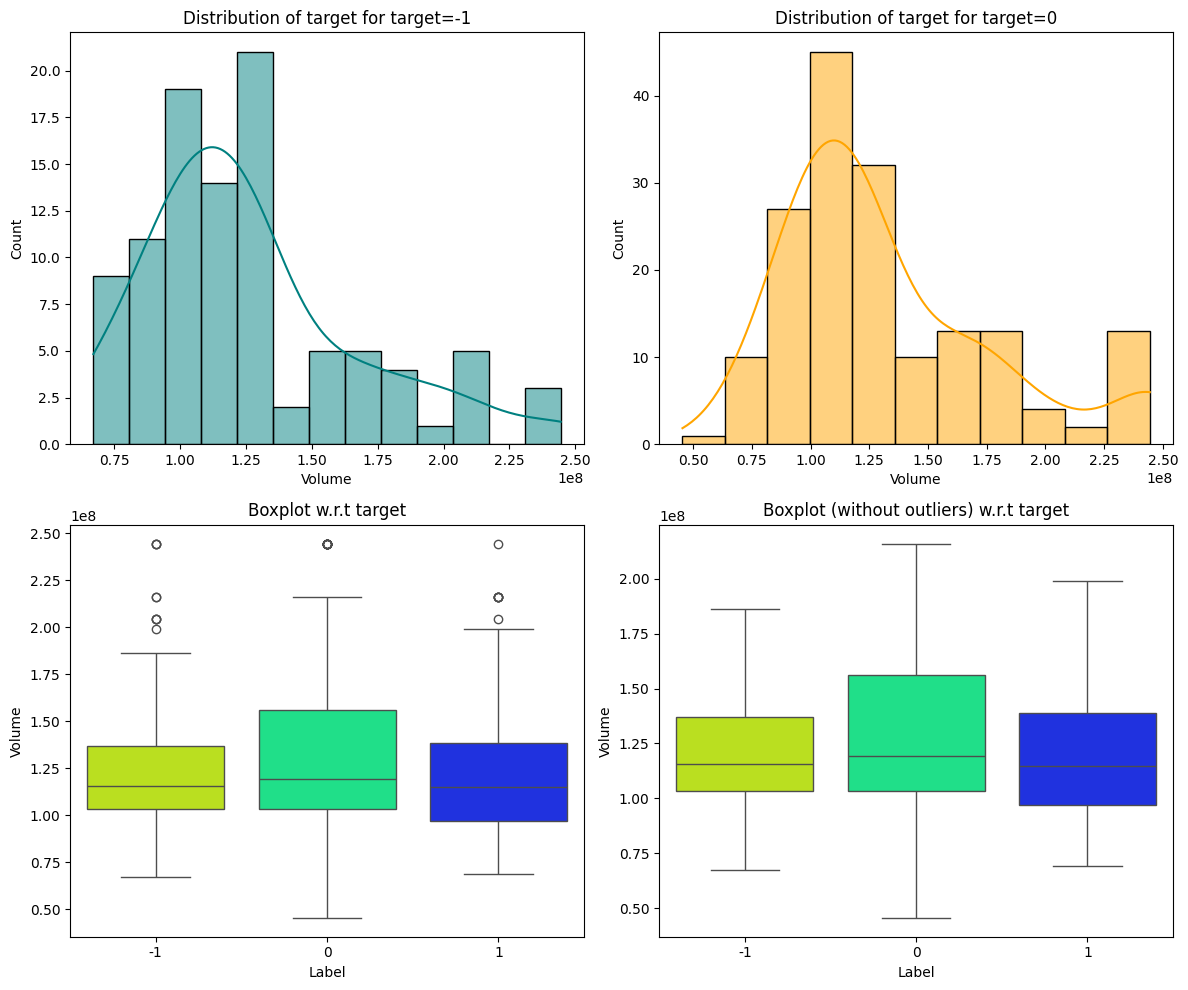

In [ ]:
distribution_plot_wrt_target(data, 'Volume', 'Label')

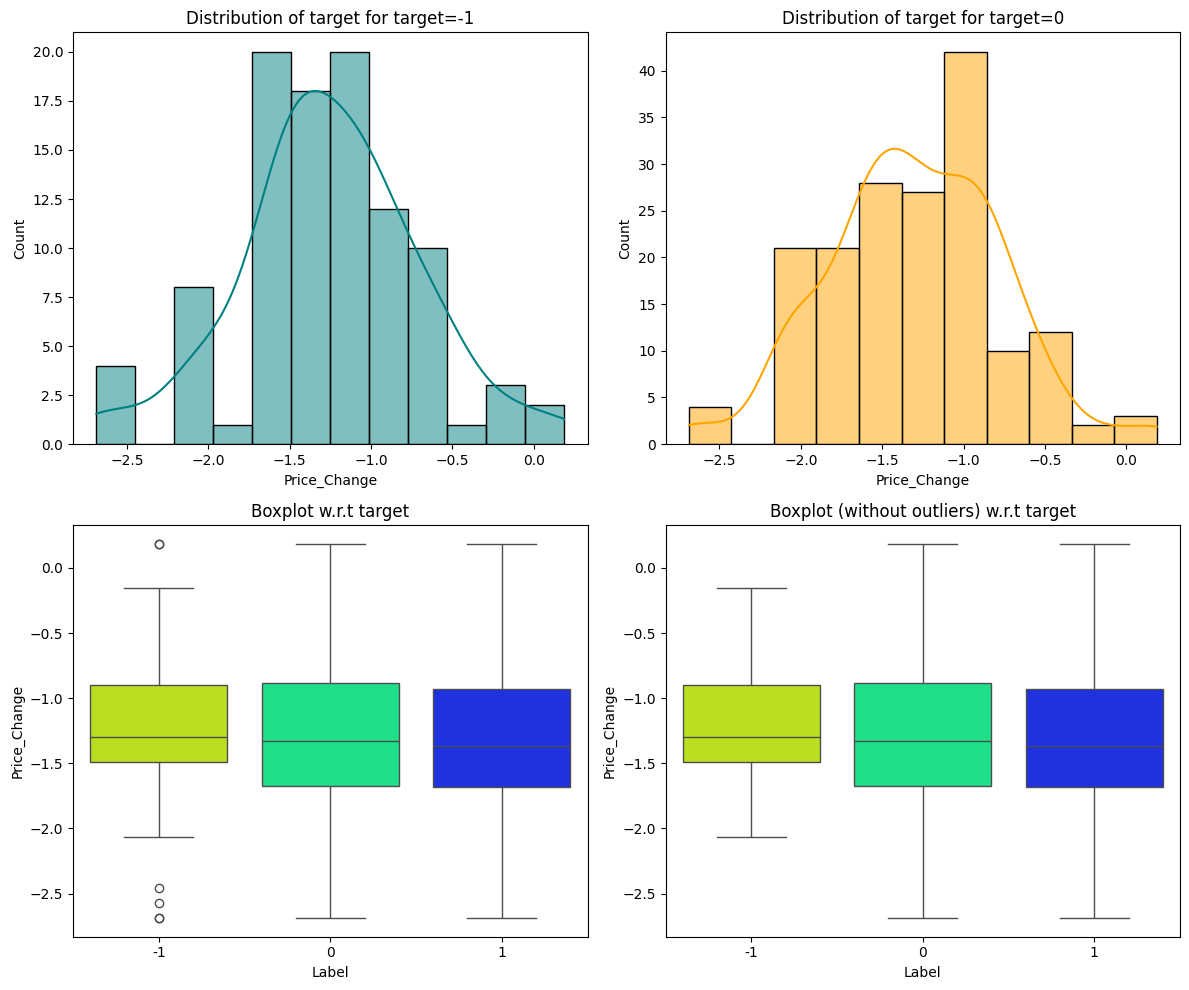

In [ ]:
distribution_plot_wrt_target(data, 'Price_Change', 'Label')

In [ ]:
# Check the distribution of labels
label_distribution = data['Label'].value_counts()
print(label_distribution)

# Check relationship with basic grouping
group_mean = data.groupby('Label')['Price_Change'].mean()
print(group_mean)

Label
 0    170
-1     99
 1     80
Name: count, dtype: int64
Label
-1   -1.255159
 0   -1.298996
 1   -1.370348
Name: Price_Change, dtype: float64


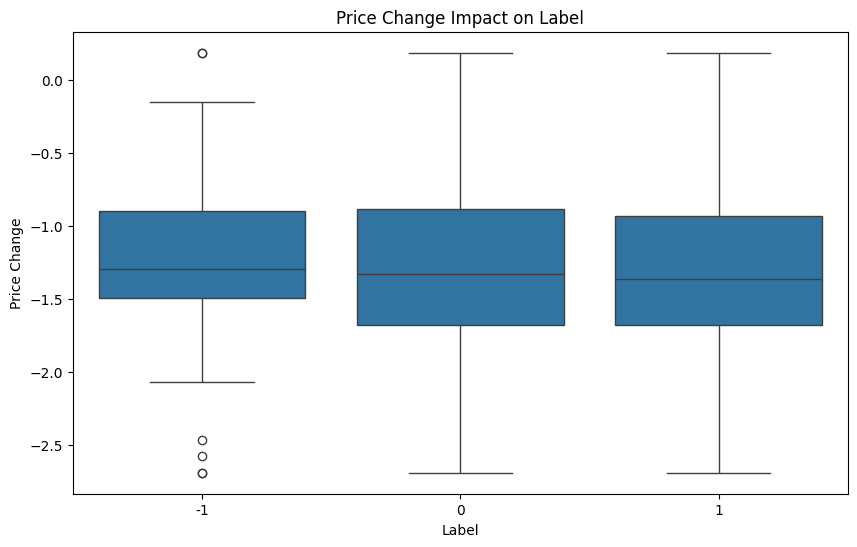

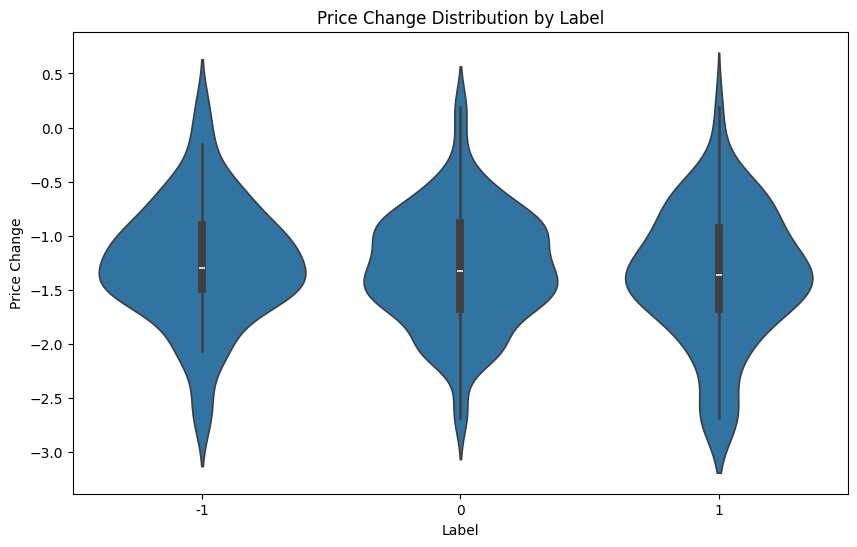

In [ ]:
# Box plot to see distribution of Price_Change across different labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Price_Change', data=data)
plt.title('Price Change Impact on Label')
plt.xlabel('Label')
plt.ylabel('Price Change')
plt.show()

# Violin plot for additional detail on distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='Label', y='Price_Change', data=data)
plt.title('Price Change Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Price Change')
plt.show()

## **Data Preprocessing**

In [ ]:
dataset = data.copy()

### Preprocessing the textual column


In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# To encode the target variable
from sklearn.preprocessing import LabelEncoder

# To import Word2Vec
from gensim.models import Word2Vec

# To tune the model
from sklearn.model_selection import GridSearchCV

# Converting the Stanford GloVe model vector format to word2vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    text = ' '.join([word for word in words if word not in stopwords.words('english')])

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    text = ' '.join([ps.stem(word) for word in words])

    return text

In [ ]:
# preprocessing the textual column
dataset['News_text_clean'] = dataset['News'].apply(preprocess_text)

## **Word Embeddings**

### Word2Vec

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in dataset['News_text_clean'].values]

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 2595


In [ ]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([-0.05487534,  0.1592397 ,  0.01217552,  0.04176909, -0.00667476,
       -0.148521  ,  0.08185544,  0.37181193,  0.04412401, -0.0755631 ,
        0.00444349, -0.1384168 ,  0.0377579 , -0.00415053, -0.1375806 ,
       -0.13801947,  0.09134057, -0.00495803,  0.02027235, -0.06732152,
       -0.08506409, -0.00044726,  0.16015264,  0.0352526 ,  0.11391535,
        0.02277072, -0.20521702,  0.05695955, -0.07075018, -0.14787927,
        0.00210722, -0.04112449,  0.04623443, -0.0372826 , -0.01458232,
        0.05960991,  0.10353494, -0.19271573, -0.01766957,  0.01773446,
       -0.09321233,  0.0090276 ,  0.02734598, -0.13367185,  0.07374615,
        0.10755915,  0.05608085,  0.06054499, -0.00356328,  0.13383767,
        0.05006986,  0.0301031 , -0.0784834 ,  0.01861861, -0.01674285,
        0.17249039,  0.07693686,  0.00655571,  0.05766213, -0.00989461,
       -0.07781924, -0.02189295,  0.02471521,  0.0123935 ,  0.04046348,
        0.08073974,  0.04319174,  0.07793088, -0.08849583, -0.06

In [ ]:
# Checking the word embedding of a random word
word = "drop"
model_W2V.wv[word]

array([-0.04653073,  0.12198897,  0.01243209,  0.03619862, -0.00137166,
       -0.11940224,  0.05873858,  0.29417172,  0.03566363, -0.06382034,
        0.00043714, -0.10323816,  0.0273987 ,  0.00047121, -0.11089644,
       -0.10697655,  0.07007896, -0.00486684,  0.01694308, -0.05634487,
       -0.0683954 ,  0.00051758,  0.13109161,  0.02324609,  0.09113614,
        0.01728429, -0.16308792,  0.04743773, -0.05286365, -0.111177  ,
        0.00175089, -0.03376664,  0.03032797, -0.02715043, -0.01153348,
        0.04830502,  0.08091611, -0.15311113, -0.00822361,  0.01489656,
       -0.07365711,  0.00809725,  0.02200322, -0.10736624,  0.05902123,
        0.08771984,  0.04251983,  0.04659119, -0.00252739,  0.1038177 ,
        0.04280548,  0.02373991, -0.05759395,  0.0137773 , -0.01102269,
        0.1392012 ,  0.06362309,  0.00217305,  0.04507061, -0.00609438,
       -0.06219909, -0.01544828,  0.02127315,  0.01206452,  0.03028854,
        0.06245387,  0.03349218,  0.06226855, -0.06924311, -0.04

In [ ]:
# Checking the word embedding of a random word
word = "market"
model_W2V.wv[word]

array([-0.06110182,  0.15867896,  0.0135581 ,  0.04127529, -0.00568835,
       -0.15425119,  0.08242813,  0.380456  ,  0.04627649, -0.07747839,
        0.00439985, -0.13788123,  0.03877901, -0.00378385, -0.13622738,
       -0.14541426,  0.09417034, -0.007251  ,  0.02421603, -0.0710676 ,
       -0.0827437 ,  0.00405924,  0.16470669,  0.03724376,  0.1169934 ,
        0.0247563 , -0.21309517,  0.05879693, -0.0693589 , -0.14855734,
        0.00237628, -0.04180927,  0.04082881, -0.03403845, -0.01061375,
        0.0572444 ,  0.10432815, -0.20085135, -0.0129776 ,  0.01689615,
       -0.09544394,  0.00702417,  0.02408661, -0.13267143,  0.07074547,
        0.11520496,  0.05568425,  0.06247802, -0.00350312,  0.13786261,
        0.05197092,  0.02999413, -0.07747449,  0.020656  , -0.01892874,
        0.18047324,  0.08152252,  0.00832575,  0.05669482, -0.00608407,
       -0.0788435 , -0.02001628,  0.02560184,  0.01053704,  0.03704105,
        0.08555028,  0.04256503,  0.07931429, -0.0918483 , -0.06

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
df_Word2Vec = pd.DataFrame(dataset['News_text_clean'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
0,-0.058255,0.160023,0.015058,0.043198,-0.005645,-0.155435,0.081267,0.382949,0.043457,-0.080428,...,0.064641,0.193078,0.137411,0.056859,0.217658,0.193441,0.013805,-0.116027,0.127857,-0.073037
1,-0.058818,0.163343,0.015262,0.043799,-0.005695,-0.158221,0.082756,0.390316,0.044206,-0.082073,...,0.065706,0.196695,0.139756,0.057679,0.221359,0.197294,0.014463,-0.118235,0.130537,-0.074827
2,-0.052748,0.145150,0.013610,0.037937,-0.004869,-0.140789,0.073573,0.347210,0.039398,-0.073068,...,0.058435,0.174903,0.124492,0.051622,0.197126,0.175554,0.012357,-0.104817,0.115837,-0.066221
3,-0.057313,0.158643,0.014786,0.042493,-0.005183,-0.153520,0.079376,0.378350,0.043302,-0.079538,...,0.063307,0.191066,0.135780,0.056527,0.214509,0.191993,0.012911,-0.114665,0.125857,-0.072041
4,-0.057659,0.158933,0.014804,0.042804,-0.005411,-0.154196,0.080154,0.380275,0.043247,-0.079706,...,0.063873,0.191859,0.136623,0.057077,0.215906,0.192226,0.013734,-0.115027,0.126803,-0.072456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.039350,0.109098,0.010776,0.029505,-0.003426,-0.105895,0.055259,0.261027,0.030397,-0.054645,...,0.043742,0.131863,0.093570,0.038844,0.148429,0.133001,0.009058,-0.078546,0.087454,-0.049707
345,-0.039551,0.109190,0.010366,0.029464,-0.002955,-0.105804,0.055267,0.260041,0.029749,-0.054466,...,0.043417,0.130946,0.093171,0.039165,0.147335,0.131319,0.009453,-0.078730,0.087277,-0.048841
346,-0.045947,0.126264,0.011174,0.033563,-0.003710,-0.122696,0.063925,0.301603,0.034559,-0.063169,...,0.050060,0.152592,0.107959,0.045000,0.171473,0.152622,0.010943,-0.091439,0.100095,-0.057286
347,-0.053181,0.146771,0.013585,0.039279,-0.005130,-0.142017,0.074043,0.350227,0.040029,-0.073285,...,0.059117,0.176482,0.125370,0.052308,0.199122,0.176965,0.012343,-0.105646,0.117243,-0.066601


### GloVe

In [ ]:
glove_input_file = '/content/drive/MyDrive/AIML_Program/NLP/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [ ]:
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [ ]:
# Checking the word embedding of a random word
word = "market"
glove_model[word]

array([ 0.39093  ,  0.23755  ,  0.44855  ,  0.11237  , -0.25996  ,
       -1.2248   , -0.44237  , -0.53491  ,  0.37142  , -0.61981  ,
       -0.27387  , -0.032213 ,  0.082629 , -0.52986  ,  0.13012  ,
        0.21703  , -0.45026  , -0.0048895,  0.34887  , -0.26069  ,
        0.56598  , -0.36219  ,  0.41926  ,  0.23441  , -0.29407  ,
       -0.27044  ,  0.29339  , -0.73905  , -0.75965  ,  0.64661  ,
       -0.038757 ,  0.38495  , -0.32314  ,  0.040322 ,  0.24036  ,
        0.35167  ,  0.47404  ,  0.014959 ,  0.12105  , -1.0398   ,
        0.27639  , -1.3785   , -0.22851  , -0.098074 ,  0.1495   ,
       -0.2815   ,  0.31682  , -0.10208  , -0.08586  , -1.5114   ,
       -0.48255  ,  0.15131  ,  0.0080133,  0.74594  , -0.20163  ,
       -2.5268   , -0.82083  ,  0.1143   ,  2.4665   ,  0.19841  ,
        0.1146   ,  0.10083  , -0.60936  ,  0.76722  ,  0.025978 ,
       -0.036936 ,  0.46744  , -0.77073  ,  0.83992  , -0.032931 ,
       -0.13127  , -0.097367 , -0.42634  , -0.49478  , -0.4079

In [ ]:
# Checking the word embedding of a random word
word = "drop"
glove_model[word]

array([ 0.2934   ,  0.49122  ,  0.021428 , -0.0032031, -0.30625  ,
       -0.70369  , -0.02503  ,  0.20014  , -0.11357  ,  0.20024  ,
       -0.096917 ,  0.24     , -0.43177  ,  0.12703  ,  0.50062  ,
        0.33529  , -0.84563  ,  0.23978  , -0.094769 ,  0.20813  ,
        0.85062  , -0.14943  , -0.10232  ,  0.74019  ,  0.11983  ,
       -0.11003  , -0.33117  , -0.31358  , -0.12285  , -0.76261  ,
        0.29028  , -0.0053144, -0.14366  ,  0.14945  , -0.25026  ,
        0.51785  ,  0.47238  , -0.2494   ,  0.069556 ,  0.041659 ,
       -0.49759  , -0.17819  , -0.16676  , -0.062862 ,  0.55204  ,
        0.026228 , -0.029453 , -0.35108  , -0.16275  , -1.4509   ,
        0.52228  ,  0.044831 , -0.25485  ,  0.95877  , -0.11863  ,
       -2.002    , -0.29194  , -0.22581  ,  2.1544   ,  0.17959  ,
        0.052697 , -0.022561 , -0.47654  ,  0.27268  ,  0.15112  ,
        0.13092  ,  0.17475  , -0.20071  ,  0.12448  , -0.05814  ,
       -0.12978  ,  0.24495  , -0.11701  ,  0.22073  , -0.0612

In [ ]:
# Checking the word embedding of a random word
word = "tech"
glove_model[word]

array([ 1.7843e-03,  6.8545e-01,  5.6025e-01, -8.6622e-01, -2.9546e-01,
       -1.0384e+00,  3.0974e-01, -6.2464e-01, -6.2188e-02,  2.8650e-01,
        8.0992e-02, -8.8250e-01, -2.3466e-01, -3.8845e-01, -8.3436e-02,
        1.2889e-01,  5.5155e-01,  3.5414e-01, -1.1191e-01,  3.4009e-01,
       -5.1375e-02, -1.3438e-01, -1.4942e-01,  4.9742e-01, -6.8934e-03,
       -7.3037e-02, -5.8057e-02, -9.7514e-02, -7.8936e-01, -3.0539e-02,
       -6.8881e-01,  3.4915e-01, -8.6009e-02,  1.9135e-01, -3.8473e-01,
       -7.1563e-01, -6.6354e-01, -1.2526e-01, -5.7488e-02, -3.4466e-02,
       -2.2225e-01, -1.0319e+00, -2.5942e-01, -1.0450e-01, -5.4620e-01,
       -2.7348e-01,  2.5347e-01,  1.2270e+00,  9.6006e-01, -1.0778e+00,
       -7.7286e-01, -1.2136e-01, -3.5255e-01, -2.8355e-01,  4.5948e-02,
       -1.4572e+00,  3.4030e-01, -4.2073e-02,  1.8725e+00, -2.5885e-02,
       -7.9068e-01, -2.3935e-03, -2.6566e-01,  1.4091e-01, -3.8906e-01,
        9.4408e-02,  9.0978e-01,  3.6179e-01,  1.7851e-01,  1.30

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
df_Glove = pd.DataFrame(dataset['News_text_clean'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Glove

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,-0.025091,0.042967,0.116176,-0.099245,-0.099562,-0.266941,-0.129265,0.080286,-0.090646,0.008517,...,-0.017063,0.156885,-0.173618,0.017792,-0.351731,0.080720,-0.009300,-0.071766,0.400022,0.046329
1,0.075789,0.279267,0.286092,-0.077898,-0.022339,-0.379945,-0.178142,-0.061498,-0.161026,0.088777,...,-0.016551,0.146223,-0.238209,-0.091082,-0.463150,0.093832,0.016530,-0.174671,0.531049,-0.026343
2,0.014897,0.207172,0.331676,-0.114473,0.116600,-0.374662,-0.168155,-0.010315,-0.086171,0.033631,...,0.120662,0.082600,-0.143998,-0.157486,-0.532710,0.129624,-0.030218,-0.157017,0.557803,-0.121953
3,-0.090954,0.123357,0.444133,-0.051370,0.011666,-0.228597,-0.246173,0.033390,-0.150130,0.002191,...,0.082228,0.127173,-0.272930,0.134984,-0.438773,0.074060,-0.046727,-0.261468,0.554238,0.067364
4,-0.016286,0.095670,0.158662,0.009404,0.022072,-0.162877,-0.133161,-0.037780,-0.213474,0.109459,...,0.076108,0.076419,-0.141350,-0.127092,-0.298950,0.181038,0.048829,-0.186550,0.361910,-0.034064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.089744,0.078603,0.355204,-0.269606,0.093859,0.229220,-0.084779,0.248824,-0.119752,0.015531,...,0.113815,-0.164158,0.054945,0.112785,-0.391273,0.064565,-0.150172,-0.331076,0.552668,0.277021
345,0.153751,0.155163,0.296305,0.042006,0.105729,-0.252609,-0.260229,-0.007662,-0.240935,-0.035625,...,0.056417,0.102090,-0.138025,0.059017,-0.511696,0.348926,0.062021,-0.030892,0.483785,0.106074
346,0.033072,0.072522,0.241457,-0.146820,-0.050864,-0.095216,-0.124294,0.112551,-0.242520,-0.060998,...,-0.011031,0.144369,-0.168728,0.120561,-0.412585,-0.009892,-0.123141,-0.258367,0.350678,0.055361
347,-0.113620,0.056063,0.216818,-0.095542,0.004862,-0.195284,-0.223138,0.078362,-0.195751,-0.034510,...,0.025093,0.007117,-0.140764,-0.045426,-0.433007,0.026847,0.035699,-0.281933,0.497955,0.019963


### Data Pre-processing

In [ ]:
# Creating dependent and independent variables
X_word2vec = df_Word2Vec.copy()
X_glove = df_Glove.copy()
y = dataset['Label']

In [ ]:
def split(X,y):
    # Initial split into training (80%) and testing (20%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

    # Further split the temporary set into validation (10%) and test (10%) sets
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [ ]:
#Splitting the dataset.
X_train_word2vec,X_valid_word2vec,X_test_word2vec,y_train_word2vec,y_valid_word2vec,y_test_word2vec=split(X_word2vec,y)
X_train_glove,X_valid_glove,X_test_glove,y_train_glove,y_valid_glove,y_test_glove=split(X_glove,y)

In [ ]:
print(X_train_word2vec.shape, X_test_word2vec.shape, X_valid_word2vec.shape)

(279, 300) (35, 300) (35, 300)


In [ ]:
print(y_train_word2vec.shape, y_test_word2vec.shape, y_valid_word2vec.shape)

(279,) (35,) (35,)


## **Sentiment Analysis**

### Model Building

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Random Forest Model (default with Word2Vec)

In [ ]:
# Building the model
rf_w2v = RandomForestClassifier(random_state=42)

# Fitting on train data
rf_w2v.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(random_state=42)

### Confusion Matrix

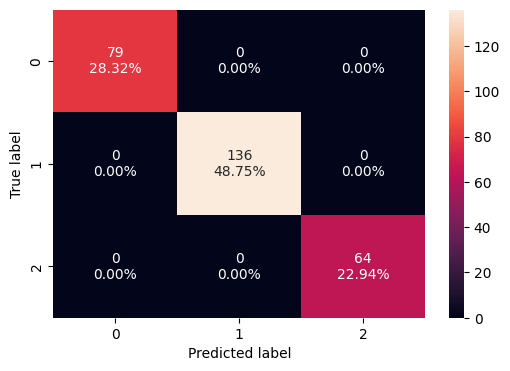

In [ ]:
confusion_matrix_sklearn(rf_w2v, X_train_word2vec, y_train_word2vec)

* Here, 0 represents negative, 1 represents neutral, and 2 represents positive sentiment

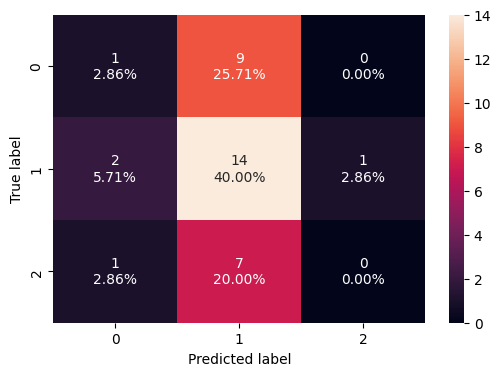

In [ ]:
confusion_matrix_sklearn(rf_w2v, X_valid_word2vec, y_valid_word2vec)

In [ ]:
# Predicting on train data
y_pred_train_word2vec = rf_w2v.predict(X_train_word2vec)

# Predicting on validation data
y_pred_valid_word2vec = rf_w2v.predict(X_valid_word2vec)

**Classification Report**

In [ ]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [ ]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

          -1       0.25      0.10      0.14        10
           0       0.47      0.82      0.60        17
           1       0.00      0.00      0.00         8

    accuracy                           0.43        35
   macro avg       0.24      0.31      0.25        35
weighted avg       0.30      0.43      0.33        35



* The model achieve a 43% recal score on the validation set.
* It struggled with all 3 types, and especially the neutral reviews.

### Random Forest Model (default with GloVe)

In [ ]:
# Building the model
rf_glove = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_glove.fit(X_train_glove, y_train_glove)

RandomForestClassifier(random_state=42)

**Confusion Matrix**

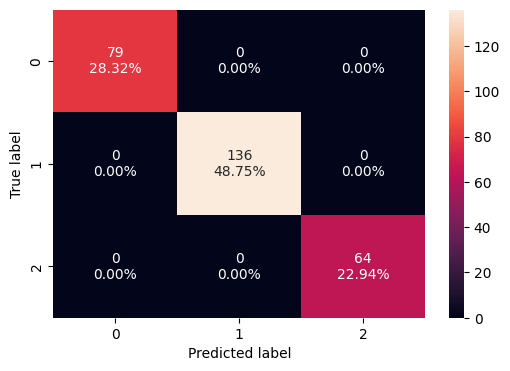

In [ ]:
confusion_matrix_sklearn(rf_glove, X_train_glove, y_train_glove)

\* Here, 0 represents negative, 1 represents neutral, and 2 represents positive sentiment

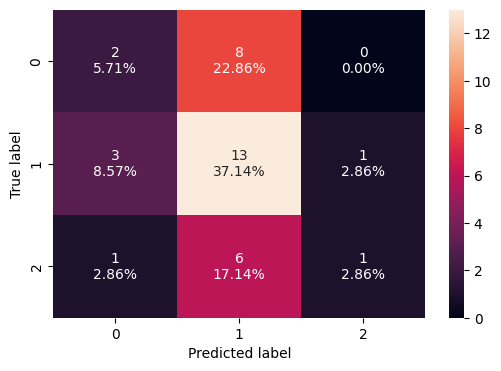

In [ ]:
confusion_matrix_sklearn(rf_glove, X_valid_glove, y_valid_glove)

In [ ]:
# Predicting on train data
y_pred_train_glove = rf_glove.predict(X_train_glove)

# Predicting on validation data
y_pred_valid_glove = rf_glove.predict(X_valid_glove)

**Classification report**

In [ ]:
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [ ]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

          -1       0.33      0.20      0.25        10
           0       0.48      0.76      0.59        17
           1       0.50      0.12      0.20         8

    accuracy                           0.46        35
   macro avg       0.44      0.36      0.35        35
weighted avg       0.44      0.46      0.40        35



Addressing the class imbalance problem

### Random Forest (with class_weights and Word2Vec)

In [ ]:
rf_word2vec_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_word2vec_balanced.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confusion Matrix**

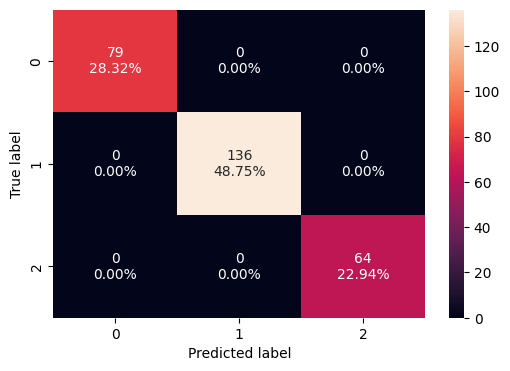

In [ ]:
confusion_matrix_sklearn(rf_word2vec_balanced, X_train_word2vec, y_train_word2vec)

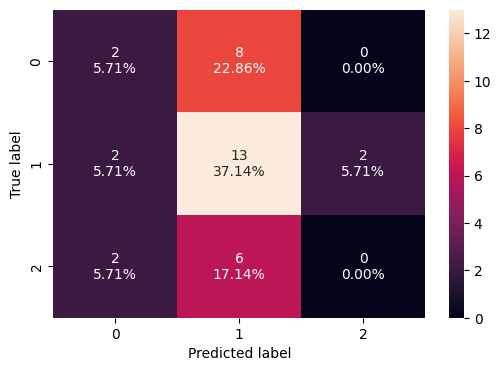

In [ ]:
confusion_matrix_sklearn(rf_word2vec_balanced, X_valid_word2vec, y_valid_word2vec)

In [ ]:
# Predicting on train data
y_pred_train = rf_word2vec_balanced.predict(X_train_word2vec)

# Predicting on test data
y_pred_valid = rf_word2vec_balanced.predict(X_valid_word2vec)

**Classification report**

In [ ]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [ ]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

          -1       0.25      0.10      0.14        10
           0       0.47      0.82      0.60        17
           1       0.00      0.00      0.00         8

    accuracy                           0.43        35
   macro avg       0.24      0.31      0.25        35
weighted avg       0.30      0.43      0.33        35



* This is still a very poor performance. It predicted the vast majority of the reviews as neutral.

### Random Forest (with class_weights and GloVe)

In [ ]:
rf_glove_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_glove_balanced.fit(X_train_glove, y_train_glove)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confusion Matrix**

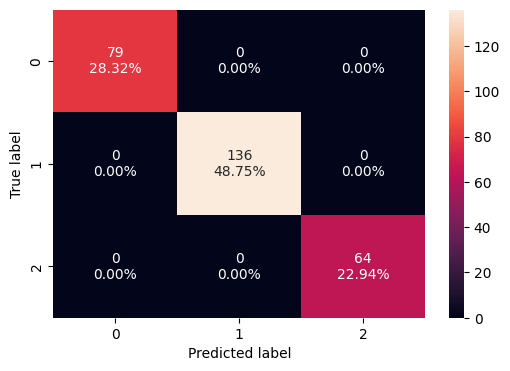

In [ ]:
confusion_matrix_sklearn(rf_glove_balanced, X_train_glove, y_train_glove)

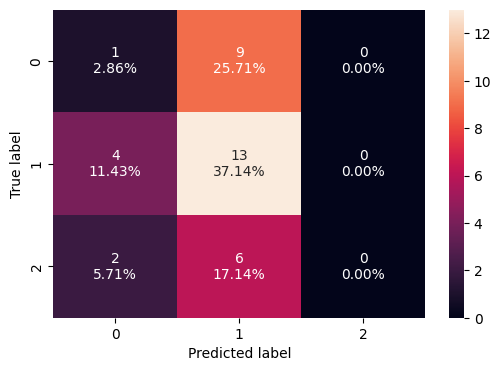

In [ ]:
confusion_matrix_sklearn(rf_glove_balanced, X_valid_glove, y_valid_glove)

* Continues to predict the majority as neutral.

In [ ]:
# Predicting on train data
y_pred_train = rf_glove_balanced.predict(X_train_glove)

# Predicting on test data
y_pred_valid = rf_glove_balanced.predict(X_valid_glove)

**Classification report**

In [ ]:
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [ ]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

          -1       0.33      0.20      0.25        10
           0       0.48      0.76      0.59        17
           1       0.50      0.12      0.20         8

    accuracy                           0.46        35
   macro avg       0.44      0.36      0.35        35
weighted avg       0.44      0.46      0.40        35



**Tuning the model**

### Random Forest (with hyperparameter tuning and Word2Vec)

In [ ]:
# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:


# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_word2vec, y_train_word2vec)

In [ ]:
# Creating a new model with the best combination of parameters
rf_word2vec_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_word2vec_tuned.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=0.7,
                       min_samples_split=5, n_estimators=30, random_state=42)

**Confusion Matrix**

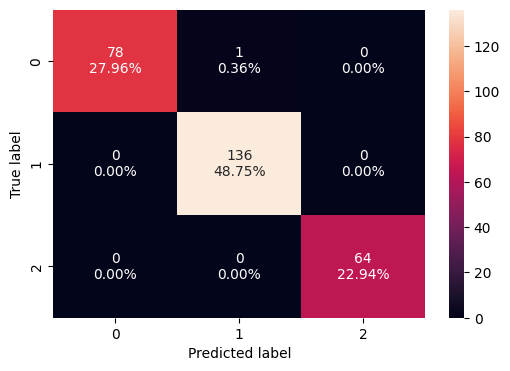

In [ ]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_train_word2vec, y_train_word2vec)

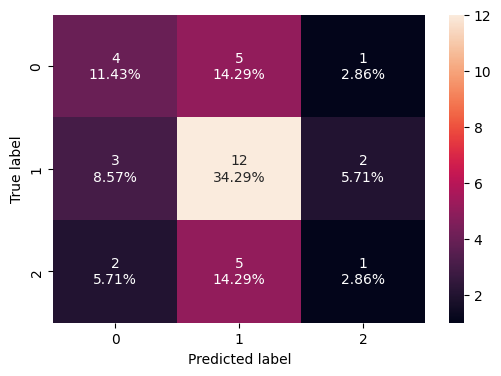

In [ ]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_valid_word2vec, y_valid_word2vec)

In [ ]:
# Predicting on train data
y_pred_train_word2vec = rf_word2vec_tuned.predict(X_train_word2vec)

# Predicting on validation data
y_pred_valid_word2vec = rf_word2vec_tuned.predict(X_valid_word2vec)

**Classification report**

In [ ]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99        79
           0       0.99      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [ ]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

          -1       0.44      0.40      0.42        10
           0       0.55      0.71      0.62        17
           1       0.25      0.12      0.17         8

    accuracy                           0.49        35
   macro avg       0.41      0.41      0.40        35
weighted avg       0.45      0.49      0.46        35



### Random Forest (with hyperparametertuning and GloVe)

In [ ]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_glove, y_train_glove)

In [ ]:
# Creating a new model with the best combination of parameters
rf_glove_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_glove_tuned.fit(X_train_glove, y_train_glove)

RandomForestClassifier(class_weight='balanced', max_depth=14,
                       min_samples_split=5, random_state=42)

**Confusion matrix**

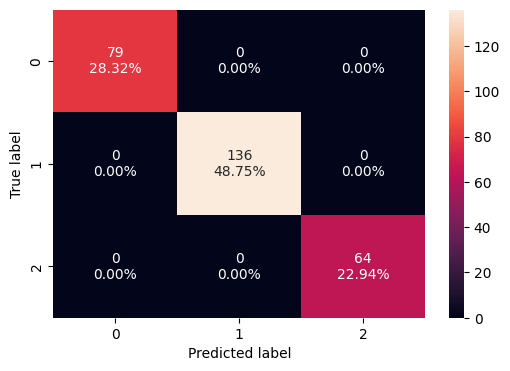

In [ ]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_glove_tuned, X_train_glove, y_train_glove)

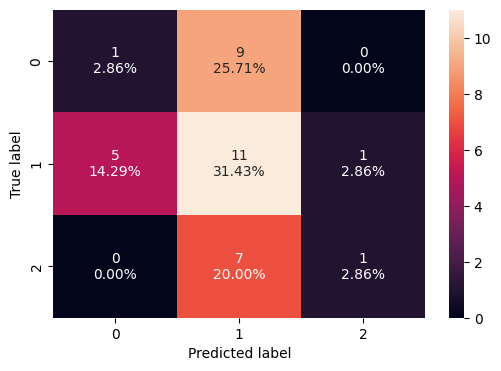

In [ ]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_glove_tuned, X_valid_glove, y_valid_glove)

In [ ]:
# Predicting on train data
y_pred_train_glove = rf_glove_tuned.predict(X_train_glove)

# Predicting on validation data
y_pred_valid_glove = rf_glove_tuned.predict(X_valid_glove)

**Classification report**

In [ ]:
#Printing
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [ ]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

          -1       0.17      0.10      0.12        10
           0       0.41      0.65      0.50        17
           1       0.50      0.12      0.20         8

    accuracy                           0.37        35
   macro avg       0.36      0.29      0.27        35
weighted avg       0.36      0.37      0.32        35



* This is worse.

### Model Building - Transformers + ML

In [ ]:
# installing the libraries for transformers
!pip install -U -q sentence-transformers transformers bitsandbytes accelerate sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 13.1 MB/s eta 0:00:00


In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning library
import torch

# to load transformer models
from sentence_transformers import SentenceTransformer
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline

# to split the data
from sklearn.model_selection import train_test_split

# to compute performance metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier


# to ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset2 = data.copy()

In [ ]:
# defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
embedding_matrix = model.encode(dataset2['News'], device=device, show_progress_bar=True)

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
# printing the shape of the embedding matrix
embedding_matrix.shape

(349, 384)

In [ ]:
# printing the embedding vector of the first news in the dataset
embedding_matrix[0,:]

array([-2.02308688e-03, -3.67735364e-02,  7.73542598e-02,  4.67134081e-02,
        3.25521305e-02,  2.10231193e-03,  4.32834737e-02,  3.95344906e-02,
        5.82279935e-02,  8.87513440e-03,  7.09636807e-02,  4.99076843e-02,
        6.46608099e-02, -4.97970264e-03, -1.30518479e-02, -2.98355557e-02,
       -8.91322084e-03, -7.82000348e-02, -2.17109658e-02, -5.24822623e-02,
       -5.14276549e-02, -3.30719985e-02, -3.32051516e-02,  4.18125615e-02,
        7.99547583e-02,  1.54092284e-02, -2.15781443e-02,  5.19438535e-02,
       -4.65799086e-02, -3.71372141e-02, -1.04225606e-01,  9.86078903e-02,
        5.21786399e-02,  3.46578993e-02,  1.48809813e-02, -4.47350414e-03,
        5.70117794e-02, -2.41722930e-02,  2.14048829e-02, -6.52144775e-02,
       -3.30645032e-02,  1.61960777e-02, -6.63141608e-02,  4.39943299e-02,
        3.82153168e-02, -4.86519411e-02,  1.62651073e-02, -4.02665772e-02,
       -3.34568229e-03,  3.20955738e-02, -3.91200650e-03, -1.26830470e-02,
        4.49698754e-02,  

#### Splitting the dataset

In [ ]:
X = embedding_matrix
y = dataset2["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(261, 384) (88, 384)


In [ ]:
print(y_train.shape, y_test.shape)

(261,) (88,)


### Model Building

In [ ]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = ['Negative', 'Neutral', 'Positive']
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Building the model
rf_transformer = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)

# Fitting on train data
rf_transformer.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [ ]:
# Predicting on train data
y_pred_train = rf_transformer.predict(X_train)

# Predicting on test data
y_pred_test = rf_transformer.predict(X_test)

**Train Data**

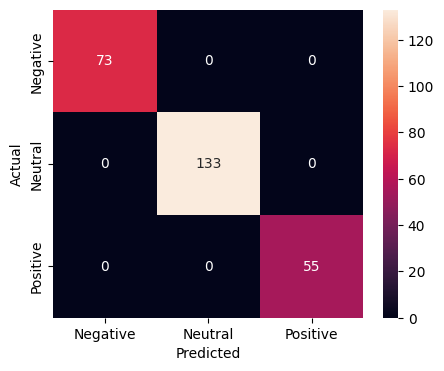

In [ ]:
plot_confusion_matrix(y_train, y_pred_train)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        73
           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00        55

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



**Test Data**

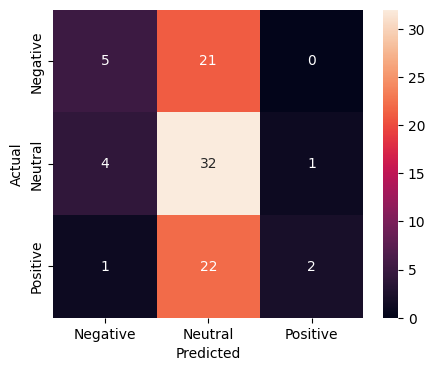

In [ ]:
plot_confusion_matrix(y_test, y_pred_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.50      0.19      0.28        26
           0       0.43      0.86      0.57        37
           1       0.67      0.08      0.14        25

    accuracy                           0.44        88
   macro avg       0.53      0.38      0.33        88
weighted avg       0.52      0.44      0.36        88



* The models would be better with a more balanced dataset.

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 136.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 255.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 297.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.2.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.1 which is incompatible.
langchain 0.3.14 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.2.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.1 w

In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
news = pd.read_csv('/content/drive/MyDrive/AIML_Program/NLP/stock_news.csv')

In [ ]:
data = news.copy()

#### Loading the model

In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

In [ ]:
# Using hf_hub_download to download a model from the Hugging Face model hub
# The repo_id parameter specifies the model name or path in the Hugging Face repository
# The filename parameter specifies the name of the file to download
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2,  # CPU cores
    n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=43,  # Change this value based on your model and your GPU VRAM pool.
    n_ctx=4096,  # Context window
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


#### Aggregating the data weekly

In [ ]:
data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

Date  \
0  2019-01-06   
1  2019-01-13   
2  2019-01-20   
3  2019-01-27   
4  2019-02-03   
5  2019-02-10   
6  2019-02-17   
7  2019-02-24   
8  2019-03-03   
9  2019-03-10   
10 2019-03-17   
11 2019-03-24   
12 2019-03-31   
13 2019-04-07   
14 2019-04-14   
15 2019-04-21   
16 2019-04-28   
17 2019-05-05   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
def generate_llama_response(instruction, review):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{review}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=1024,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False,
        # seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

- **`max_tokens`**: This parameter **specifies the maximum number of tokens that the model should generate** in response to the prompt.

- **`temperature`**: This parameter **controls the randomness of the generated response**. A higher temperature value will result in a more random response, while a lower temperature value will result in a more predictable response.

- **`top_p`**: This parameter **controls the diversity of the generated response by establishing a cumulative probability cutoff for token selection**. A higher value of top_p will result in a more diverse response, while a lower value will result in a less diverse response.

- **`repeat_penalty`**: This parameter **controls the penalty for repeating tokens in the generated response**. A higher value of repeat_penalty will result in a lower probability of repeating tokens, while a lower value will result in a higher probability of repeating tokens.

- **`top_k`**: This parameter **controls the maximum number of most-likely next tokens to consider** when generating the response at each step.

- **`stop`**: This parameter is a **list of tokens that are used to dynamically stop response generation** whenever the tokens in the list are encountered.

- **`echo`**: This parameter **controls whether the input (prompt) to the model should be returned** in the model response.

- **`seed`**: This parameter **specifies a seed value that helps replicate results**.


In [ ]:
data_1 = data.copy()

In [ ]:
# defining the instructions for the model
instruction_1 = """
    You are an AI analyzing news articles. Tag the given article using one or more of the below mentioned categories only depending upon the content of the article:
    - Positive
    - Negative
    - Neutral
"""

In [ ]:
data_1['model_response_1'] = data_1['News'].apply(lambda x: generate_llama_response(instruction_1, x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.gene

In [ ]:
#Printing the model's response.
data_1["model_response_1"]

,model_response_1
0,"Sure, I can help you with that! Here's my analysis of the given article based on its content:\n\nCategory: Negative\n\nThe article discusses a decline in the tech sector and specifically mentions notable suppliers experiencing stock drops following Apple's revenue warning. The tone is negative as it highlights a downward revision of revenue expectations, which indicates a decrease in sales and potentially a challenging period for these companies."
1,"Sure, I can help you with that! Here's my analysis of the given article based on its content:\n\nCategory: Negative\n\nThe article discusses how Apple lowered its fiscal Q1 revenue guidance due to weaker than expected iPhone sales. This is a negative development for the company and has led to a significant drop in its stock price, as well as negatively impacting related suppliers. The overall tone of the article is negative, highlighting the challenges faced by Apple in the current market."
2,"Sure, I can help you with that! Based on the content of the article, I would tag it as follows:\n\n* Negative: The article mentions that Apple has cut its revenue forecast due to weaker demand in China and fewer iPhone upgrades, which is a negative development for the company.\n* Neutral: The article also mentions constrained sales of Airpods and Macbooks, but does not provide any specific information on why this might be the case.\n\nOverall, the tone of the article is neutral-negative, as it highlights a negative development (the revenue forecast cut) while providing some additional context without taking a clear stance or expressing an opinion."
3,"Sure, I can help you with that! Based on the content of the article, I would tag it as follows:\n\nTag: Negative\n\nThe article reports on negative economic indicators such as weak economic data from China and Europe, which suggests a slowdown in global growth. Additionally, the partial U.S. government shutdown is also mentioned as a factor contributing to investor concerns. Overall, the tone of the article is negative due to its focus on adverse economic conditions and their potential impact on markets."
4,"Sure, I can help you with that! Here's my analysis of the given article based on its sentiment and categorization:\n\nCategory: Negative\n\nThe article discusses Apple's revenue warning, which has led to a decline in the USD JPY pair and a gain in Japanese yen. The underperformance of Apple in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, has triggered risk aversion in markets. This negative news about Apple's performance is likely to have an impact on the company's stock price and investor sentiment. Therefore, the article can be categorized as having a Negative sentiment."
...,...
344,"Sure, I can help you with that! Here's my analysis of the given article based on its content:\n\nCategory: Neutral\n\nThe article is reporting on Oprah Winfrey's consideration of endorsing a Democratic presidential candidate in 2020. The tone of the article is neutral, as it simply states the fact and does not express any opinion or bias. There is no negative or positive language used in the article, and it does not take sides or make any value judgments. Therefore, I have categorized the article as Neutral."
345,"Sure, I can help you with that! Here's my analysis of the given news article based on its sentiment:\n\nCategory: Negative\n\nReason: The article mentions ""decline in China's manufacturing activity"" and ""awaiting euro zone economic growth numbers"", which are negative indicators for the European economy. Additionally, the statement ""European shares fell"" also suggests a negative tone."
346,"Sure, I can help you with that! Based on the content of the article, I would tag it as follows:\n\nPositive:\n\n* The S&P 500 reached a record high close, indicating a strong stock market.\n* Apple's quarterly results and positive earnings forecast eased concerns about the bull run's sust

In [ ]:
#Printing the model's response.
data_1["model_response_1"][0]

" Sure, I can help you with that! Here's my analysis of the given article based on its content:\n\nCategory: Negative\n\nThe article discusses a decline in the tech sector and specifically mentions notable suppliers experiencing stock drops following Apple's revenue warning. The tone is negative as it highlights a downward revision of revenue expectations, which indicates a decrease in sales and potentially a challenging period for these companies."

In [ ]:
def extract_label(model_response):
    if 'positive' in model_response.lower():
        return 'Positive'
    elif 'negative' in model_response.lower():
        return 'Negative'
    else:
      return 'Neutral'

In [ ]:
data_1["Label"] = data_1["model_response_1"].apply(extract_label)

In [ ]:
final_data_1 = data_1.drop(['model_response_1'], axis=1)
final_data_1.head(15)

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,Negative
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,Negative
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,Negative
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,Negative
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",41.740002,42.244999,41.482498,40.246914,130672400,Negative
5,2019-01-02,"Apple CEO Tim Cook discussed the company's Q1 warning on CNBC, attributing US-China trade tensions as a factor. Despite not mentioning iPhone unit sales specifically, Cook indicated Apple may comment on them again. Services revenue is projected to exceed $10.8 billion in Q1. Cook also addressed the lack of",41.740002,42.244999,41.482498,40.246914,130672400,Negative
6,2019-01-02,"Roku Inc has announced plans to offer premium video channels on a subscription basis through its free streaming service, The Roku Channel. Partners include CBS Corp's Showtime, Lionsgate's Starz, and Viacom Inc's Noggin. This model follows Amazon's successful Channels business, which generated an estimated",41.740002,42.244999,41.482498,40.246914,130672400,Positive
7,2019-01-02,"Wall Street saw modest gains on Wednesday but were threatened by fears of a global economic slowdown following Apple's shocking revenue forecast cut, blaming weak demand in China. The tech giant's suppliers and S&P 500 futures also suffered losses. Reports of decelerating factory activity in China and the euro zone",41.740002,42.244999,41.482498,40.246914,130672400,Negative
8,2019-01-02,"Apple's fiscal first quarter revenue came in below analysts' estimates at around $84 billion, a significant drop from the forecasted range of $89-$93 billion. The tech giant attributed the shortfall to lower iPhone revenue and upgrades, as well as weakness in emerging markets. Several brokerages had already reduced their production estimates",41.740002,42.244999,41.482498,40.246914,130672400,Negative
9,2019-01-02,"Apple Inc. lowered its quarterly sales forecast for the fiscal first quarter, underperforming analysts' expectations due to slowing Chinese economy and trade tensions. The news sent Apple shares tumbling and affected Asia-listed suppliers like Hon Hai Precision Industry Co Ltd, Taiwan Semiconductor Manufacturing Company, and LG Innot",41.740002,42.244999,41.482498,40.246914,130672400,Negative


### Classifying the News and returning a structured output

In [ ]:
data_2 = data.copy()

In [ ]:
# defining the instructions for the model
instruction_2 = """
    You are an AI analyzing news articles. Tag the given article using one of the below mentioned categories only and not any other depending upon the content of the article:
    - Positive
    - Negative
    - Neutral

    Format the output as a JSON object with a single key-value pair as shown below:
    {"label": "your_label_prediction"}
"""

In [ ]:
data_2['model_response_2'] = data_2['News'].apply(lambda x: generate_llama_response(instruction_2, x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.gene

In [ ]:
#Printing the model's response.
data_2["model_response_2"][0]

NameError: name 'data_2' is not defined

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_sentiment = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_sentiment)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [ ]:
#Applying the function.
data_2["model_response_2_parsed"] = data_2["model_response_2"].apply(extract_json_data)

In [ ]:
#Printing the labels predicted by the model.
data_2["model_response_2_parsed"]

In [ ]:
data_2[data_2["model_response_2_parsed"]=={}]

In [ ]:
model_response_parsed_df_2 = pd.json_normalize(data_2['model_response_2_parsed'])
model_response_parsed_df_2.head()

In [ ]:
data_with_parsed_model_output_2 = pd.concat([data_2, model_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

In [ ]:
final_data_2 = data_with_parsed_model_output_2.drop(['model_response_2','model_response_2_parsed'], axis=1)
final_data_2.head()

### Classifying the news sentiment and generating a headline

In [ ]:
data_3 = data.copy()

In [ ]:
# defining the instructions for the model
instruction_3 = """
    You are an AI analyzing news articles. Tag the given article using oneof the below mentioned categories only depending upon the content of the article:
    - Positive
    - Negative
    - Neutral

    Once done,craft a compelling headline summarizing the key insights and significance of the article.Ensure the headline is attention-grabbing and concise while accurately reflecting the content and output it.

    Provide the output in a JSON format with the following keys:
    {
        "Label": "your_label_prediction",
        "Headline": "your_headline_prediction",
    }

    Only return the JSON, do not return any other information and remove the extra spaces.
"""

In [ ]:
data_3['model_response_3'] = data_3['News'].apply(lambda x: generate_llama_response(instruction_3, x).replace('\n', ''))

In [ ]:
data_3["model_response_3_parsed"] = data_3["model_response_3"].apply(extract_json_data)

In [ ]:
data_3["model_response_3_parsed"]

In [ ]:
data_3[data_3["model_response_3_parsed"]=={}]

In [ ]:
data_3["model_response_3"][43]

In [ ]:
model_response_parsed_df_3 = pd.json_normalize(data_3['model_response_3_parsed']).drop(["label"],axis=1)
model_response_parsed_df_3.head()

In [ ]:
data_with_parsed_model_output_3 = pd.concat([data_3, model_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

In [ ]:
final_data_3 = data_with_parsed_model_output_3.drop(['model_response_3','model_response_3_parsed'], axis=1)
final_data_3.head()

### Classifying the news sentiment, generating a headline, and generating a summary

In [ ]:
data_4 = data.copy()

In [ ]:
# defining the instructions for the model
instruction_4 = """
    You are an AI analyzing news articles. Tag the given article using one of the below mentioned categories only depending upon the content of the article:
    - Positive
    - Negative
    - Neutral

    Once done,craft a compelling headline summarizing the key insights and significance of the article.Ensure the headline is attention-grabbing and concise while accurately reflecting the content and output it.

    Further,"Summarize the key points and main arguments presented in the news article, while providing a concise yet comprehensive overview of the information and its implications."
    Provide the output in a JSON format with the following keys:
    {
        "Label": "your_label_prediction",
        "Headline": "your_headline_prediction",
        "Summary": "your_summary_prediction"
    }

    Only return the JSON, do not return any other information and remove the extra spaces.
"""

In [ ]:
data_4['model_response_4'] = data_4['News'].apply(lambda x: generate_llama_response(instruction_4, x).replace('\n', ''))

In [ ]:
data_4["model_response_4_parsed"] = data_4["model_response_4"].apply(extract_json_data)

In [ ]:
data_4["model_response_4_parsed"]

In [ ]:
data_4[data_4["model_response_4_parsed"]=={}]

In [ ]:
data_4["model_response_4"][43]

In [ ]:
data_4["model_response_4_parsed"][43] = {"Label": "Sports","Headline": "Hewitt Wins Washington Open, Fine-Tunes Game for US Open","Summary": "Lleyton Hewitt won the $500,000 Washington Open, defeating Gilles Muller in straight sets.The victory fine-tuned his game ahead of the US Open."}

In [ ]:
model_response_parsed_df_4 = pd.json_normalize(data_4['model_response_4_parsed'])
model_response_parsed_df_4.head()

In [ ]:
data_with_parsed_model_output_4 = pd.concat([data_4, model_response_parsed_df_4], axis=1)
data_with_parsed_model_output_4.head()

In [ ]:
final_data_4 = data_with_parsed_model_output_4.drop(['model_response_4','model_response_4_parsed'], axis=1)
final_data_4.head()

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

##### Checking the model output on the weekly data

##### Formatting the model output

## **Conclusions and Recommendations**

* This final model can be used to categorize the sentiment and provide a summary of the news. This information will help with making more accurate predictions and decision regarding stock trades.

-




In [ ]:
!pip install --upgrade jupyter nbconvert ipywidgets



In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/AIML_Program/NLP/NLP_Project_Full_Code_Version2.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/AIML_Program/NLP/NLP_Project_Full_Code_Version2.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 563, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/python

<font size=6 color='blue'>Power Ahead</font>
___